In [1]:
import numpy as np
import pandas as pd

In [2]:
medical_df = pd.read_csv('/Users/satishadhikari/Downloads/insurance.csv')

In [3]:
medical_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [4]:
#create an automated system to estimate the annual medical expenditure for new customers

In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#there is no null values

In [7]:
medical_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [8]:
#here we can see that, the min amount of charges is approx 1000 and the average is under 10k. but the max charges is above 60k .
#this means there is an outlier in that category

In [9]:
#bmi here means the mass of a person in kg/ the sqaure of their height in meters

In [10]:
!pip install jovian --quiet

In [11]:
import jovian


In [12]:
#EDA and Visualization

In [13]:
#for visualization we can use Plotly library as well . It is interactive.

In [14]:
!pip intsall matplotlib plotly seaborn --quiet

ERROR: unknown command "intsall" - maybe you meant "install"


In [15]:
import plotly.express as px
import matplotlib.pyplot as plt

In [16]:
import seaborn as sns
%matplotlib inline 
#the purpose of using this is to ensure that anycharts we create show as op in jupyter notebooks not as popup.

In [17]:
#to improve the default styles and font of our charts


In [18]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.facecolor'] = '#00000000'

In [19]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [20]:
fig = px.histogram(medical_df,
                  x = 'age',
                  marginal = 'box',
                  nbins = 47,
                  title = ' Distribution of Age')
fig.update_layout(bargap = 0.1)
fig.show()

In [21]:
#there is a boxplot above histogram 

In [22]:
pip show plotly

Name: plotly
Version: 5.9.0
Summary: An open-source, interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: Chris P
Author-email: chris@plot.ly
License: MIT
Location: /opt/anaconda3/lib/python3.11/site-packages
Requires: tenacity
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [23]:
#for bmi

In [24]:
medical_df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [25]:
fig = px.histogram(medical_df,
                  x = 'bmi',
                  marginal = 'box',
                  color_discrete_sequence =['red'],
                  title ='Distribution of Body Mass Index')
fig.update_layout(bargap = 0.1)
fig.show()

In [26]:
#the measurement of bmi index shows Gaussian distribution or normal distribution centered around the value 30
#A continuous probability distribution that is symmetrical and bell-shaped.

# Underweight: BMI < 18.5
# Normal weight: BMI 18.5 - 24.9
# Overweight: BMI 25 - 29.9
# Obesity:
# Class 1 (Moderate obesity): BMI 30 - 34.9
# Class 2 (Severe obesity): BMI 35 - 39.9
# Class 3 (Very severe or morbid obesity): BMI ≥ 40




In [27]:
#in the bar graph the dotted redline shows the presence of outliers

In [28]:
#visualizing the charges column


In [29]:
medical_df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [30]:
fig = px.histogram(medical_df,
                  x = 'charges',
                  marginal = 'box',
                  color = 'smoker',     #creates the color according to if the person is a smoker or not
                  color_discrete_sequence = [ 'blue', 'grey'],
                  title = 'Distribution of charges')
fig.update_layout(bargap = 0.1)
fig.show()

In [31]:
#here we can see that, the smokers tend to have more medical charges compared to non-smokers

In [32]:
#lets check if the sex and region factor effects the charges as well

In [33]:
medical_df.sex.describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

In [34]:
fig = px.histogram(medical_df,
                  x = 'charges',
                  marginal ='box',
                  color = 'sex',
                  color_discrete_sequence = ['grey', 'green'],
                  title = 'Distribution of Charges by Sex')
fig.update_layout()
fig.show()

In [35]:
#the "upper fence" refers to a boundary used to identify potential outliers in a dataset, especially in the box plot. It is calculated as:


#.      Upper Fence=𝑄3+(1.5×IQR)Upper Fence=Q3+(1.5×IQR)

#from the fig we can see that the majority of male popn has the charges in between 2k-15 k while the outliers or few male has the highest charges ranging to 62k.


In [36]:
medical_df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [37]:
px.histogram(medical_df, x = 'smoker', color = 'sex', title = 'Smoker')

In [38]:


#relationship between two variables(use scatterplot to visualize the relationship between two variables)


In [39]:
#age and charges

In [40]:
fig = px.scatter(medical_df,
                    x ='age',
                    y= 'charges',
                    color = 'smoker',
                    opacity = 0.8,
                    hover_data =['sex'],
                    title = 'AGE VS CHARGES')
fig.update_traces(marker_size = 5)
fig.show()

In [41]:
#correlation between bmi and charges

In [42]:
fig = px.scatter(medical_df,
                x = 'bmi',
                y= 'charges',
                color = 'smoker',
                opacity = 0.8,
                hover_data = ['sex'],
                title= 'BMI vs Charges')
fig.update_traces(marker_size = 5)
fig.show()

In [43]:
#there are major 2 clusters where the smokers having high bmi tend to have generally high charges.
#While looking at the non smoker category there seems to have no clearer relationship among bmi and charges except for few instances which maybae occured due to some unfortunate incidents like accidents, genetics or so

In [44]:
#using violin plot

In [45]:
px.scatter(medical_df, x = 'children', y = 'charges')

In [46]:
#here we see no distinct patterns and few datas when using scatterplot 
#Now using violinplot

In [47]:
px.violin(medical_df, x = 'children', y = 'charges')

In [48]:
#correlation coefficient

In [49]:
medical_df.charges.corr(medical_df.age)

0.2990081933306478

In [50]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

In [51]:
#converting categorical data to numeric data

In [52]:
medical_df['smoker'] = medical_df['smoker'].map({'yes':1, 'no':0})

In [53]:
medical_df.smoker

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [54]:
medical_df.charges.corr(medical_df.smoker)

0.7872514304984778

In [55]:
#here we can see that,there is a high correlation between age and charges than bmi and charges. the value of correlation ranges from -1 to 1.
#1 being the strongest correlation and -1 being the weakest

In [56]:
medical_df.head()

age     sex     bmi  children  smoker     region      charges
0   19  female  27.900         0       1  southwest  16884.92400
1   18    male  33.770         1       0  southeast   1725.55230
2   28    male  33.000         3       0  southeast   4449.46200
3   33    male  22.705         0       0  northwest  21984.47061
4   32    male  28.880         0       0  northwest   3866.85520

In [57]:
#lets change other categorical values as well


In [58]:
medical_df['sex'] = medical_df['sex'].map({'male':1, 'female':0})

In [59]:
medical_df.head()

age  sex     bmi  children  smoker     region      charges
0   19    0  27.900         0       1  southwest  16884.92400
1   18    1  33.770         1       0  southeast   1725.55230
2   28    1  33.000         3       0  southeast   4449.46200
3   33    1  22.705         0       0  northwest  21984.47061
4   32    1  28.880         0       0  northwest   3866.85520

In [60]:
medical_df.charges.corr(medical_df.sex)

0.05729206220202533

In [61]:
medical_df.sex.corr(medical_df.sex)

1.0

In [62]:
#the result of .corr is a correlation matrix and is visualized using the heatmap


In [63]:
medical_df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [64]:
medical_df.drop('region', axis = 1, inplace = True)

In [65]:
medical_df.head()

age  sex     bmi  children  smoker      charges
0   19    0  27.900         0       1  16884.92400
1   18    1  33.770         1       0   1725.55230
2   28    1  33.000         3       0   4449.46200
3   33    1  22.705         0       0  21984.47061
4   32    1  28.880         0       0   3866.85520

In [66]:
medical_df.corr()

age       sex       bmi  children    smoker   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000  0.787251
charges   0.299008  0.057292  0.198341  0.067998  0.787251  1.000000

Text(0.5, 1.0, 'Correlation Matrix')

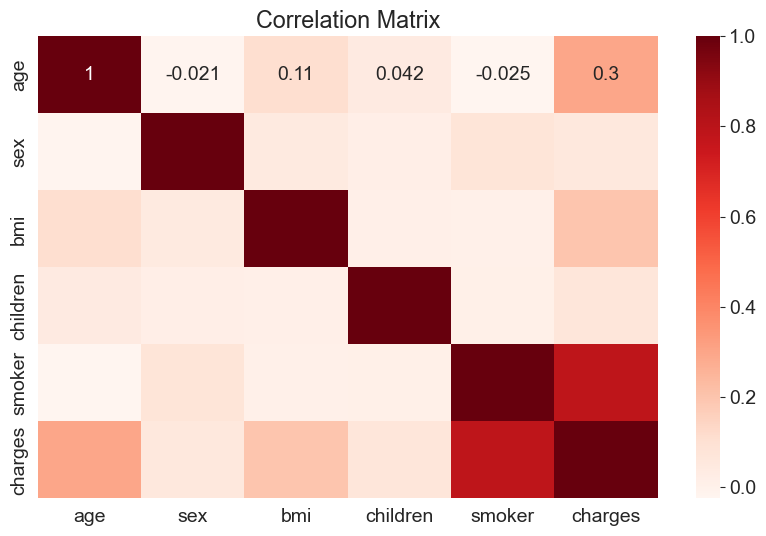

In [67]:
sns.heatmap(medical_df.corr(), cmap ='Reds', annot = True)
plt.title('Correlation Matrix')

In [68]:
correlation_matrix = medical_df[['age', 'bmi','children', 'charges']].corr()

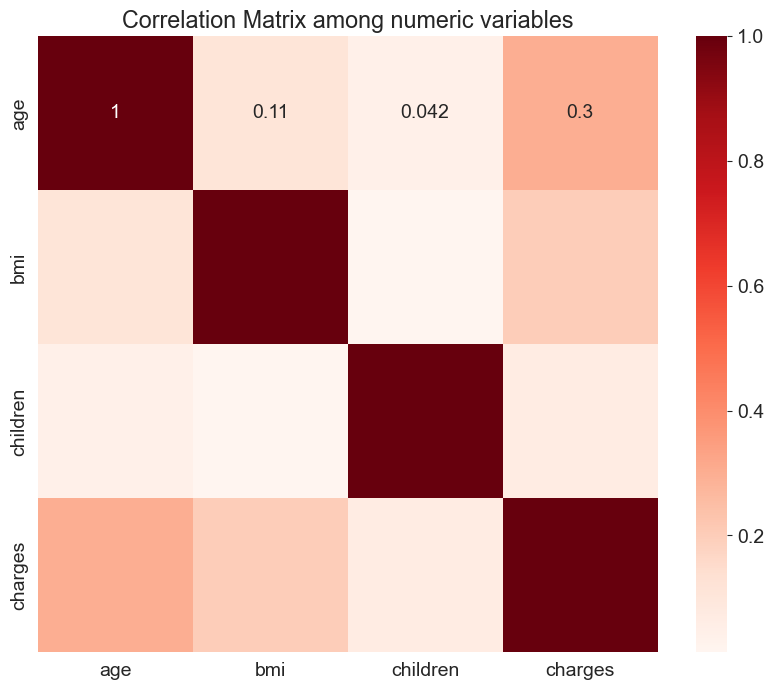

<Figure size 1000x600 with 0 Axes>

In [69]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap = 'Reds', annot = True)
plt.title('Correlation Matrix among numeric variables');
plt.show()
plt.clf()

In [70]:
correlation_matrix

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

In [71]:
#we can see that the columns age and smoker column has a high correlation with the column charges

In [72]:
#lets try a way to find the way of estimating the values of charges using the age column. since the smoker column is a categorical variable we cannot really use it effectively.
#age is continuous

In [73]:
#lets differentiate smoker and non smoker first.
#first we find the value of age for non smokers

In [74]:
nonsmokers_df = medical_df[medical_df.smoker == 0]

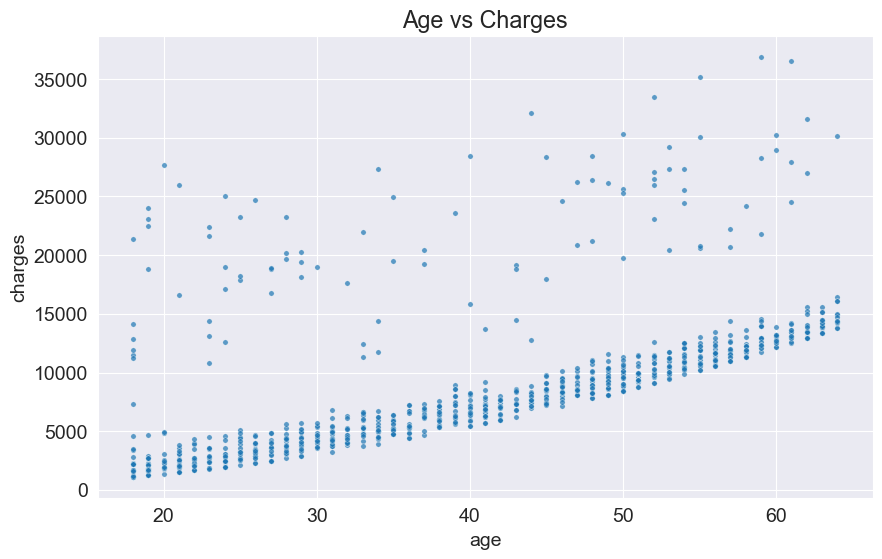

In [75]:
plt.title('Age vs Charges')
sns.scatterplot(data = nonsmokers_df, x ='age', y='charges', alpha = 0.7, s=15);

In [76]:
#apart from few exceptions we see see the points forms a line. So we try to fit the best fit line so that it can accomodate new datafeed into the model

In [77]:
#linear regression

In [78]:
#y=wx+b    where w= slope or called as weight and b is the intercept or bias in statistics and ML

In [79]:
# This is called the linear regression


In [80]:
#lets define the helping function first
def estimate_charges(age, w, b):
    return w * age + b


In [81]:
w = 50
b = 100

In [82]:
estimate_charges(40, w, b)

2100

In [83]:
#this value seems to very low compared to the linear line we got using the scatterplot so lets verify these

In [84]:
ages = nonsmokers_df.age

In [85]:
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [86]:
estimated_charges = estimate_charges(ages, w, b)

In [87]:
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [88]:
#this is the estimated charges we got using our model lets compare this with the actual charges.

In [89]:
nonsmokers_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [90]:
#seems that we are way too off while predicting the model

Text(0, 0.5, 'estimated_charges')

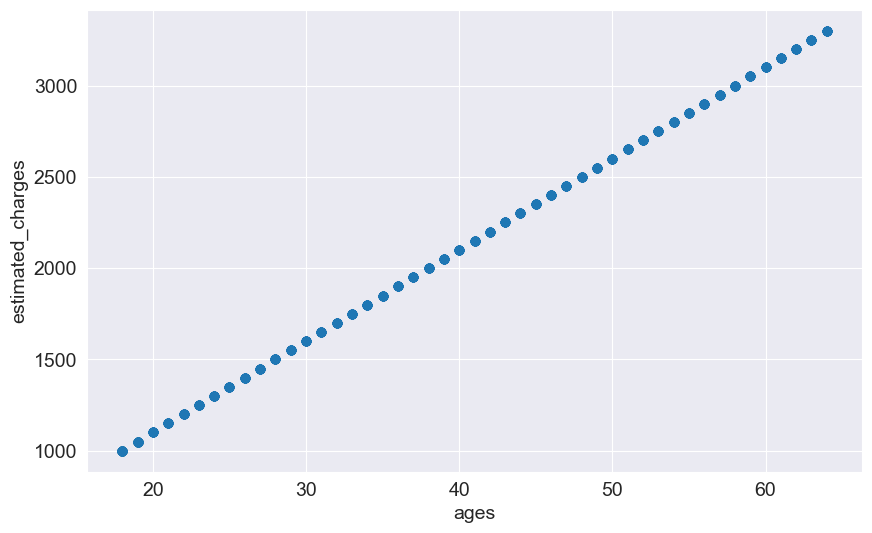

In [91]:
plt.scatter(ages, estimated_charges)
plt.xlabel('ages')
plt.ylabel('estimated_charges')

Text(0, 0.5, 'estimated_charges')

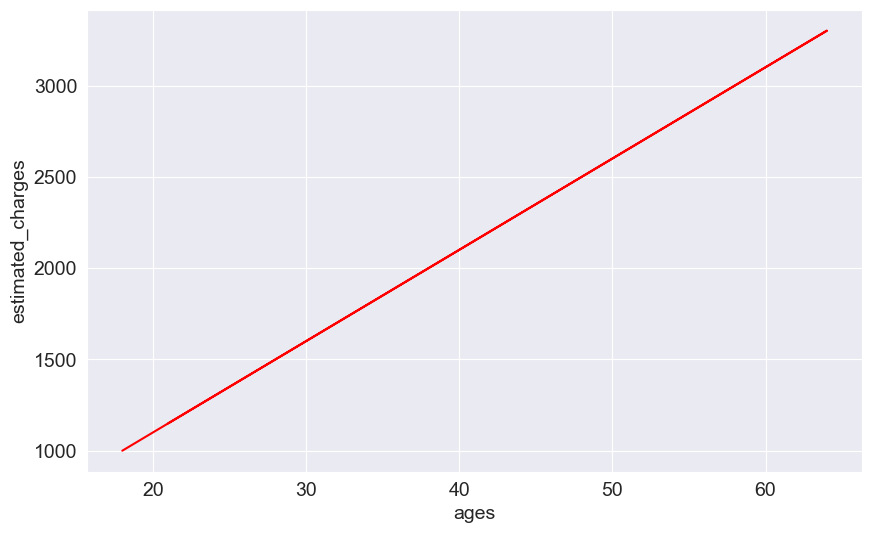

In [92]:
plt.plot(ages, estimated_charges, 'r-')
plt.xlabel('ages')
plt.ylabel('estimated_charges')

In [93]:
# as expected , the points lie ona straight line
# we can lay this line on the actual data, and lets see how our model fits the data

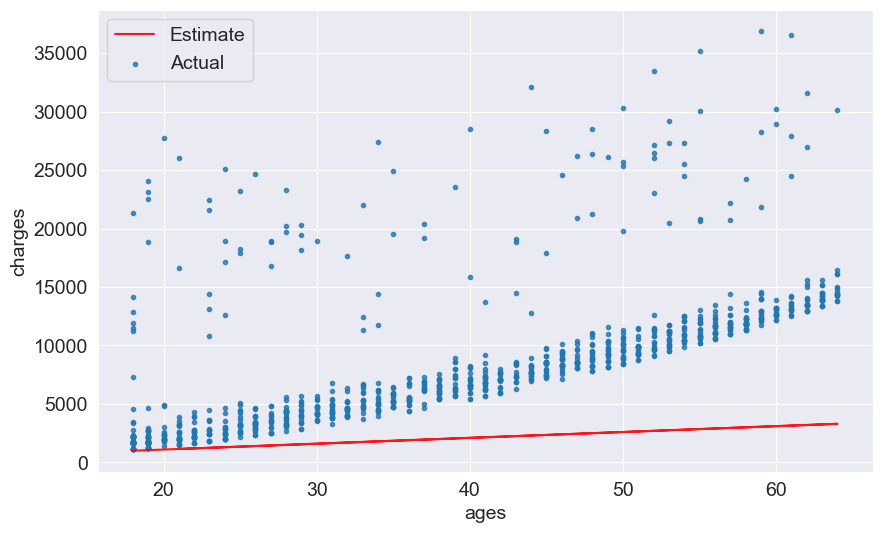

In [94]:
target= nonsmokers_df.charges

plt.plot(ages, estimated_charges, 'r', alpha = 0.9)
plt.scatter(ages, target, s=9, alpha = 0.8)
plt.xlabel('ages')
plt.ylabel('charges')
plt.legend(['Estimate', 'Actual'])

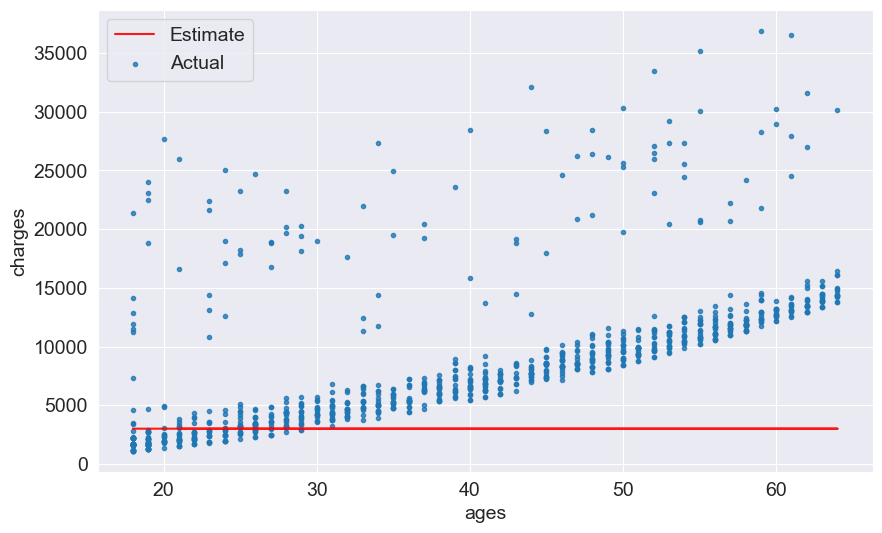

In [95]:
def try_parameters(ages, w, b):
    ages = nonsmokers_df.age
    target= nonsmokers_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha = 0.9)
    plt.scatter(ages, target, s=9, alpha = 0.8)
    plt.xlabel('ages')
    plt.ylabel('charges')
    plt.legend(['Estimate', 'Actual'])

try_parameters(ages, 0, 3000)


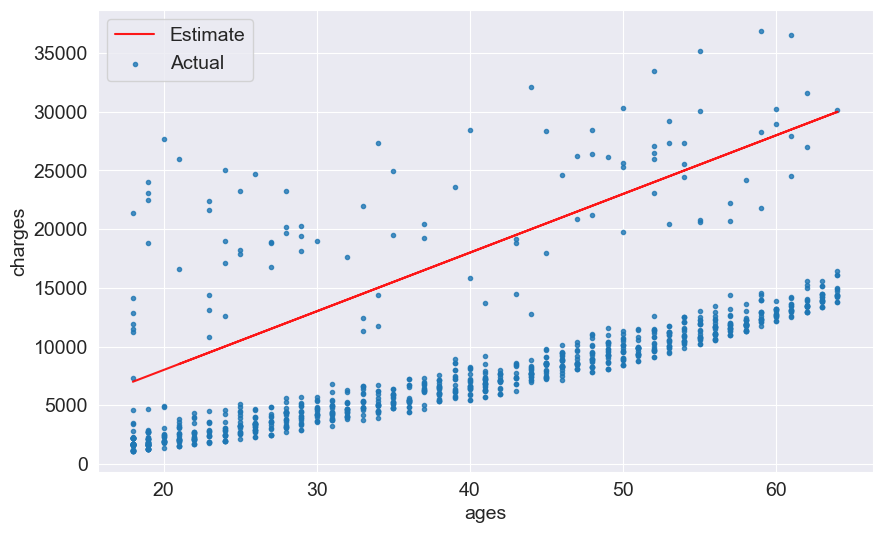

In [96]:
try_parameters(ages, 500, -2000)

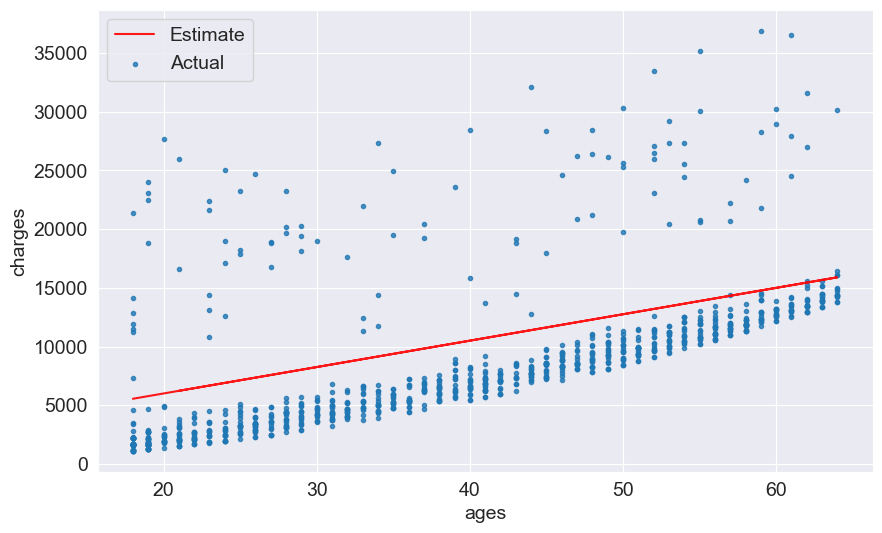

In [97]:
try_parameters(ages, 225,1500)

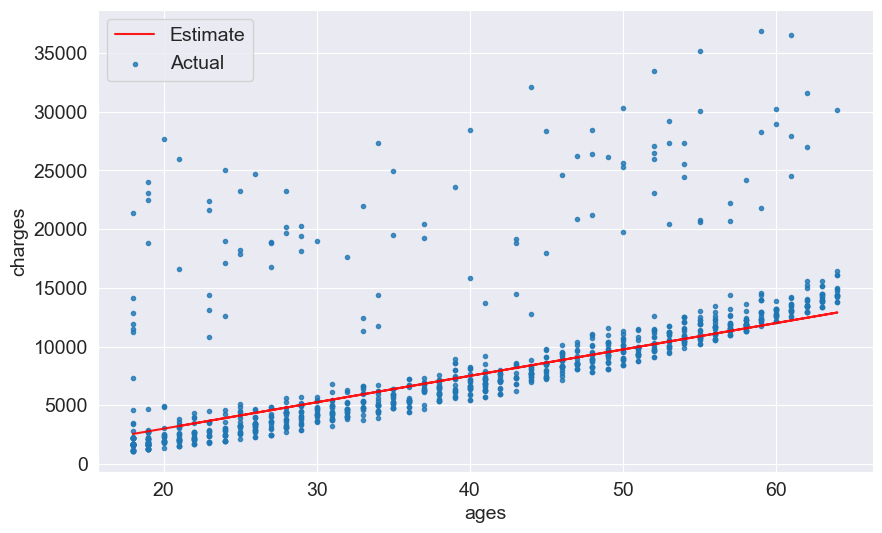

In [98]:
try_parameters(ages, 225,-1500)

In [99]:
predictions = estimated_charges


In [100]:
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [101]:
targets = nonsmokers_df.charges

In [102]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [103]:
#lets find the rmse


In [104]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [105]:
w = 50
b = 100

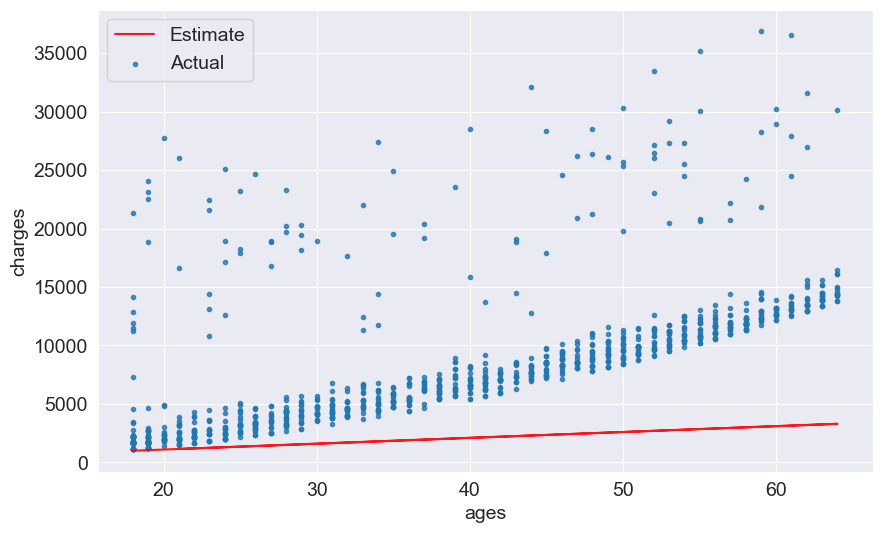

In [106]:
try_parameters(ages, w,b)
targets = nonsmokers_df.charges
predictions = estimate_charges(nonsmokers_df.age, w, b)

In [107]:
rmse(targets, predictions)

8461.949562575493

In [108]:
#on average each element in the prediction varies the actual charges by 8461 $
#this is called loss and shows how bad the model is at predicting the target variables. The lower the loss the better the model

RMSE loss : 8461.949562575493


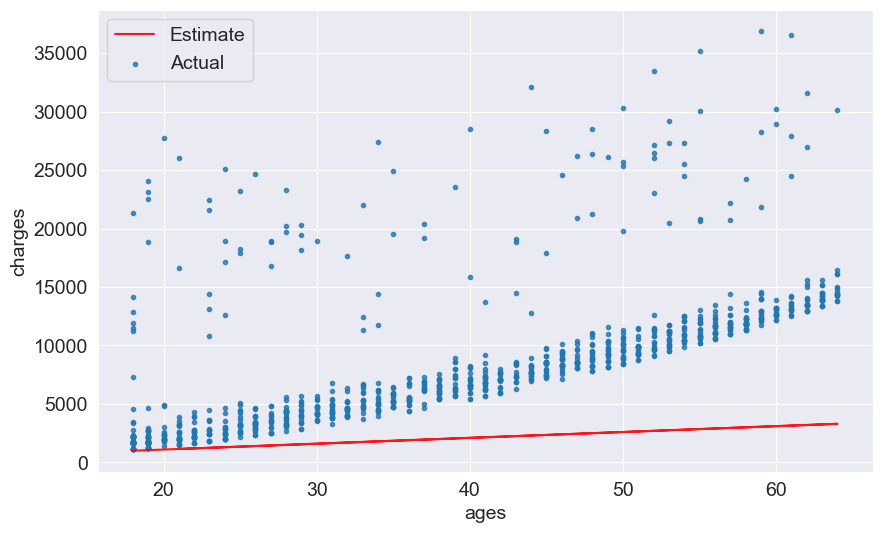

In [109]:
def try_parameters(ages, w, b):
    ages = nonsmokers_df.age
    target= nonsmokers_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha = 0.9)
    plt.scatter(ages, target, s=9, alpha = 0.8)
    plt.xlabel('ages')
    plt.ylabel('charges')
    plt.legend(['Estimate', 'Actual'])

    loss = rmse(targets, predictions)
    print('RMSE loss :', loss)
try_parameters(ages, 50, 100)


RMSE loss : 8461.949562575493


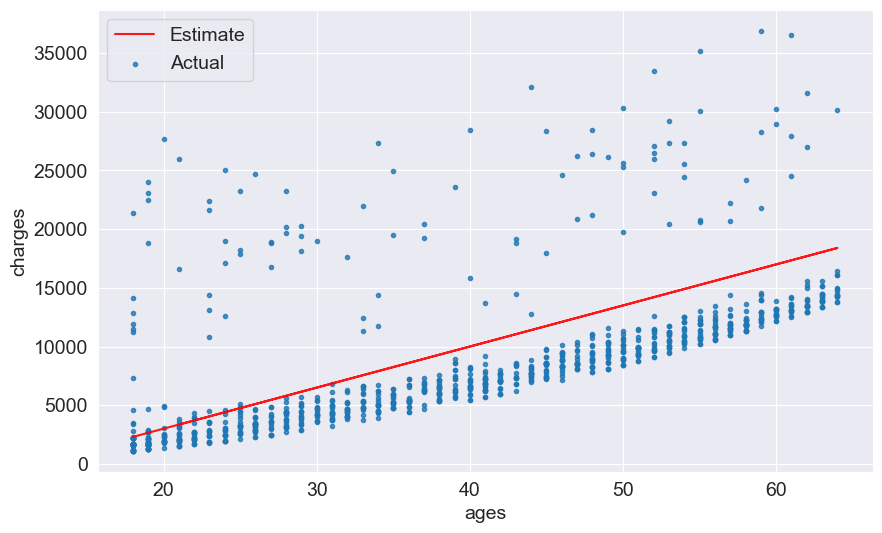

In [110]:
try_parameters(ages, 350, -4000)

RMSE Loss: 4991.993804156943


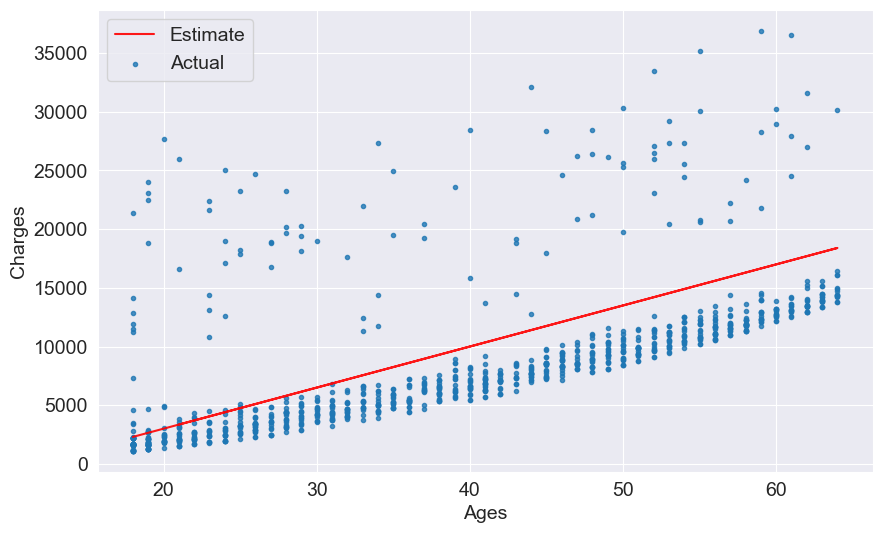

In [111]:
def try_parameters(ages, w, b):
    # Use ages and charges from the nonsmokers DataFrame
    ages = nonsmokers_df.age
    target = nonsmokers_df.charges

    # Estimate charges using the given w and b
    estimated_charges = estimate_charges(ages, w, b)

    # Plot the results
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=9, alpha=0.8)
    plt.xlabel('Ages')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

    # Calculate RMSE loss
    loss = rmse(target, estimated_charges)  # Pass correct variables
    print('RMSE Loss:', loss)
try_parameters(ages, 350, -4000)


RMSE Loss: 4663.625311774971


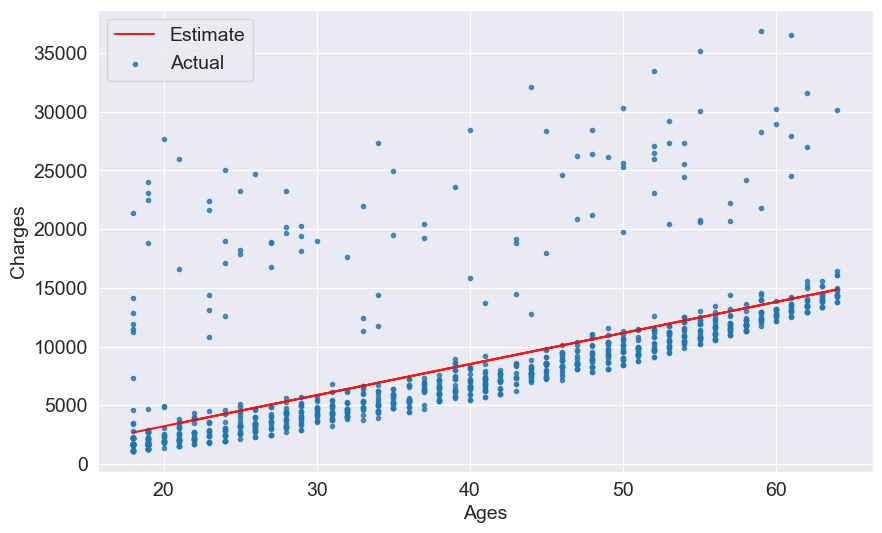

In [112]:
def try_parameters(ages, w, b):
    # Use ages and charges from the nonsmokers DataFrame
    ages = nonsmokers_df.age
    target = nonsmokers_df.charges

    # Estimate charges using the given w and b
    estimated_charges = estimate_charges(ages, w, b)

    # Plot the results
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=9, alpha=0.8)
    plt.xlabel('Ages')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

    # Calculate RMSE loss
    loss = rmse(target, estimated_charges)  # Pass correct variables
    print('RMSE Loss:', loss)
try_parameters(ages, 265, -2100)


In [113]:
!pip install scikit-learn --quiet

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
model = LinearRegression()

In [116]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [117]:
inputs = nonsmokers_df[['age']]

In [118]:
targets = nonsmokers_df.charges

In [119]:
print('input.shape :', inputs.shape)
print('targets.shape :', targets.shape)

input.shape : (1064, 1)
targets.shape : (1064,)


In [120]:
model.fit(inputs, targets)

LinearRegression()

In [121]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [122]:
predictions = model.predict(inputs)

In [123]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [124]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [125]:
rmse(targets, predictions)

4662.505766636395

In [126]:
model.coef_

array([267.24891283])

In [127]:
model.intercept_

-2091.420556565021

RMSE Loss: 4662.505766636395


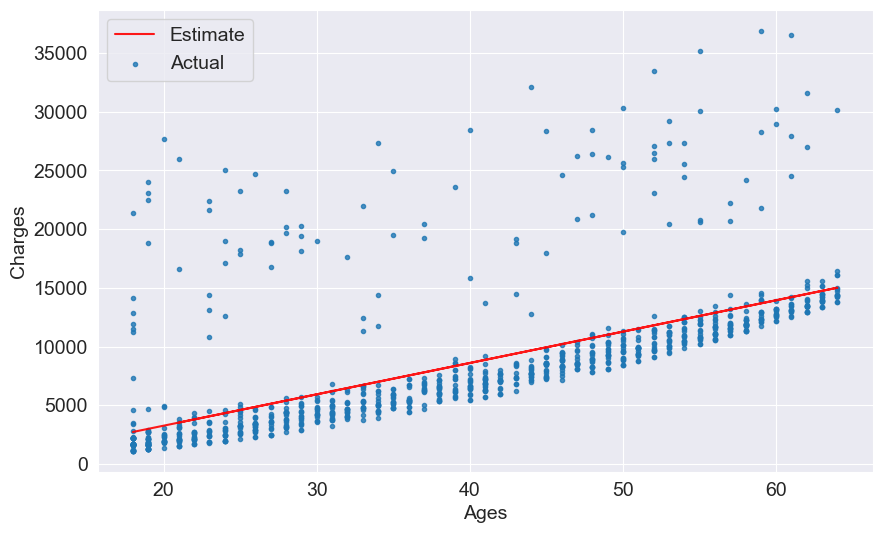

In [128]:
try_parameters(ages, model.coef_, model.intercept_)

In [129]:
#TASKS: use SGD regressor 
#for smokers

In [130]:
from sklearn.linear_model import SGDRegressor